In [1]:
import torch
import torch.nn as nn
import os
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from PIL import Image
import torch.nn.functional as F
import torch.optim as optim
# import i2v
import numpy as np
import matplotlib.pyplot as plt

## 构造数据集

In [2]:
categories = ['disgust','fear','happy','surprise','sad','angry','neutral']
# label = 0,1,2,3,4,5,6

In [3]:
file_train = []
file_test = []
number_train = []
number_test = []

In [4]:
# categories.index('neutral')
# number_train.append(1)
# number_train

In [5]:
# category = 'neutral'
for category in categories:
    label = categories.index(category)
    for root,dirs,files in os.walk("..//detect_faces//"+str(category)): 
        for file in files:
            file_type = file.split('_')[1]
    #         print(file_type)
            # train_data
            if file_type == 'train':
                file_train.append(os.path.join(root,file))
                number_train.append(label)
            else:
                file_test.append(os.path.join(root,file))
                number_test.append(label)

In [6]:
print("trainset_size: "+ str(len(file_train)))
print("testset_size: "+ str(len(file_test)))

trainset_size: 32080
testset_size: 8016


In [7]:
class testset(Dataset):
    def __init__(self, transform=None):
        #定义好 image 的路径
        self.images = file_test
        self.target = number_test
        self.transform = transform

    def __getitem__(self, index):
        image = self.images[index]
        image = Image.open(image)
        if self.transform:
            image = self.transform(image)
        target = self.target[index]
        return image,target

    def __len__(self):
        return len(self.images)

In [8]:
class trainset(Dataset):
    def __init__(self, transform=None):
        #定义好 image 的路径
        self.images = file_train
        self.target = number_train
        self.transform = transform

    def __getitem__(self, index):
        image = self.images[index]
        image = Image.open(image)
        if self.transform:
            image = self.transform(image)
        target = self.target[index]
        return image,target

    def __len__(self):
        return len(self.images)

In [9]:
# 应用了torchvision.transforms.ToTensor，其作用是将数据归一化到[0,1]（是将数据除以255）
# [0.485, 0.456, 0.406]这一组平均值是从imagenet训练集中抽样算出来的。
# 数据如果分布在(0,1)之间，可能实际的bias，就是神经网络的输入b会比较大，
# 而模型初始化时b=0的，这样会导致神经网络收敛比较慢，经过Normalize后，可以加快模型的收敛速度。
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
transform = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

In [10]:
train_dataset = trainset(transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64,shuffle=True)
test_dataset = testset(transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64,shuffle=False)

## 模型搭建

In [11]:
# class Net1(torch.nn.Module):
#     def __init__(self):
#         super(Net1,self).__init__()
#         self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
#         self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
#         self.conv3 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
#         self.pooling1 = torch.nn.MaxPool2d(2)
#         self.pooling2 = torch.nn.MaxPool2d(4)
#         self.fc1 = torch.nn.Linear(4096,4096)
#         self.fc2 = torch.nn.Linear(4096,4096)
#         self.fc3 = torch.nn.Linear(4096,7)
    
#     def forward(self,x):
#         batch_size = x.size(0)
#         x = self.pooling1(F.relu(self.conv1(x)))
#         x = self.pooling2(F.relu(self.conv2(x)))
#         x = self.pooling2(F.relu(self.conv3(x)))
#         # flatten
#         x = x.view(batch_size, -1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [12]:
# class Net2(torch.nn.Module):
#     def __init__(self):
#         super(Net2,self).__init__()
#         self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
#         self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
#         self.conv3 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
#         self.conv4 = torch.nn.Conv2d(256,256,kernel_size=3,padding=1)
#         self.pooling1 = torch.nn.MaxPool2d(2)
#         self.pooling2 = torch.nn.MaxPool2d(4)
#         self.fc1 = torch.nn.Linear(4096,4096)
#         self.fc2 = torch.nn.Linear(4096,4096)
#         self.fc3 = torch.nn.Linear(4096,7)
    
#     def forward(self,x):
#         batch_size = x.size(0)
#         x = self.pooling1(F.relu(self.conv1(x)))
#         x = self.pooling2(F.relu(self.conv2(x)))
#         x = F.relu(self.conv3(x))
#         x = F.relu(self.conv4(x))
#         x = self.pooling2(x)
#         # flatten
#         x = x.view(batch_size, -1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [13]:
# class Net3(torch.nn.Module):
#     def __init__(self):
#         super(Net3,self).__init__()
#         self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
#         self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
#         self.conv3 = torch.nn.Conv2d(128,128,kernel_size=3,padding=1)
#         self.conv4 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
#         self.conv5 = torch.nn.Conv2d(256,256,kernel_size=3,padding=1)
#         self.pooling1 = torch.nn.MaxPool2d(2)
#         self.pooling2 = torch.nn.MaxPool2d(4)
#         self.fc1 = torch.nn.Linear(4096,4096)
#         self.fc2 = torch.nn.Linear(4096,4096)
#         self.fc3 = torch.nn.Linear(4096,7)
    
#     def forward(self,x):
#         batch_size = x.size(0)
#         x = self.pooling1(F.relu(self.conv1(x)))
#         x = F.relu(self.conv2(x))
#         x = F.relu(self.conv3(x))
#         x = self.pooling2(x)
#         x = F.relu(self.conv4(x))
#         x = F.relu(self.conv5(x))
#         x = self.pooling2(x)
#         # flatten
#         x = x.view(batch_size, -1)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

In [14]:
# Ensemble模型
class Net1_mix(torch.nn.Module):
    def __init__(self):
        super(Net1_mix,self).__init__()
        self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
        self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
        self.conv3 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
        self.pooling1 = torch.nn.MaxPool2d(2)
        self.pooling2 = torch.nn.MaxPool2d(4)
        self.dropout = torch.nn.Dropout(0.5)
        self.fc1 = torch.nn.Linear(4096,4096)
        self.fc2 = torch.nn.Linear(4096,4096)
    
    def forward(self,x):
        batch_size = x.size(0)
        x = self.pooling1(F.relu(self.conv1(x)))
        x = self.pooling2(F.relu(self.conv2(x)))
        x = self.pooling2(F.relu(self.conv3(x)))
        # flatten
        x = x.view(batch_size, -1)
        x = self.fc1(x)
        x = self.dropout(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = self.dropout(x)
        x = F.relu(x)
        return x
class Net2_mix(torch.nn.Module):
    def __init__(self):
        super(Net2_mix,self).__init__()
        self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
        self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
        self.conv3 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
        self.conv4 = torch.nn.Conv2d(256,256,kernel_size=3,padding=1)
        self.pooling1 = torch.nn.MaxPool2d(2)
        self.pooling2 = torch.nn.MaxPool2d(4)
        self.dropout = torch.nn.Dropout(0.5)
        self.fc1 = torch.nn.Linear(4096,4096)
        self.fc2 = torch.nn.Linear(4096,4096)
    
    def forward(self,x):
        batch_size = x.size(0)
        x = self.pooling1(F.relu(self.conv1(x)))
        x = self.pooling2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pooling2(x)
        # flatten
        x = x.view(batch_size, -1)
        x = self.fc1(x)
        x = self.dropout(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = self.dropout(x)
        x = F.relu(x)
        return x
class Net3_mix(torch.nn.Module):
    def __init__(self):
        super(Net3_mix,self).__init__()
        self.conv1 = torch.nn.Conv2d(3,64,kernel_size=3,padding=1)
        self.conv2 = torch.nn.Conv2d(64,128,kernel_size=3,padding=1)
        self.conv3 = torch.nn.Conv2d(128,128,kernel_size=3,padding=1)
        self.conv4 = torch.nn.Conv2d(128,256,kernel_size=3,padding=1)
        self.conv5 = torch.nn.Conv2d(256,256,kernel_size=3,padding=1)
        self.pooling1 = torch.nn.MaxPool2d(2)
        self.pooling2 = torch.nn.MaxPool2d(4)
        self.dropout = torch.nn.Dropout(0.5)
        self.fc1 = torch.nn.Linear(4096,4096)
        self.fc2 = torch.nn.Linear(4096,4096)
    
    def forward(self,x):
        batch_size = x.size(0)
        x = self.pooling1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pooling2(x)
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.pooling2(x)
        # flatten
        x = x.view(batch_size, -1)
        x = self.fc1(x)
        x = self.dropout(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = self.dropout(x)
        x = F.relu(x)
        return x
# 声明网络
model_net1 = Net1_mix()
model_net2 = Net2_mix()
model_net3 = Net3_mix()
# 导入参数
save_path = '..//Final-Project//model_save//'
state_dict1 = torch.load(save_path+"Net1_drop_epoch10.pth")
state_dict2 = torch.load(save_path+"Net2_drop_epoch10.pth")
state_dict3 = torch.load(save_path+"Net3_drop_epoch10.pth")

keys = []
for k,v in state_dict1.items():
  #将‘fc3’开头的key过滤掉，这里是要去除的层的key
    if k.startswith('fc3'):  
        continue
    keys.append(k)

# 去除指定层后的模型
state_dict1 = {k:state_dict1[k] for k in keys}

keys = []
for k,v in state_dict2.items():
  #将‘fc3’开头的key过滤掉，这里是要去除的层的key
    if k.startswith('fc3'):  
        continue
    keys.append(k)
# 去除指定层后的模型
state_dict2 = {k:state_dict2[k] for k in keys}

keys = []
for k,v in state_dict3.items():
  #将‘fc3’开头的key过滤掉，这里是要去除的层的key
    if k.startswith('fc3'):  
        continue
    keys.append(k)

# 去除指定层后的模型
state_dict3 = {k:state_dict3[k] for k in keys}

#自己定义的模型，但要保证前面保存的层和自定义的模型中的层一致
model_net1.load_state_dict(state_dict1)
model_net2.load_state_dict(state_dict2)
model_net3.load_state_dict(state_dict3)

class NetMix(torch.nn.Module):
    def __init__(self):
        super(NetMix,self).__init__()
        self.net1 = model_net1
        self.net2 = model_net2
        self.net3 = model_net3
        for p in self.parameters():
            p.requires_grad = False #预训练模型加载进来后全部设置为不更新参数，然后再后面加层
        self.fc = torch.nn.Linear(4096*3,7)
    
    def forward(self,x):
        batch_size = x.size(0)
        x1 = self.net1(x)
        x2 = self.net2(x)
        x3 = self.net3(x)
        # 拼接输入
        x = torch.cat((x1,x2,x3),dim = 1)
        # 输出
        x = self.fc(x)
        return x

## 模型配置

### Net1配置

In [15]:
# model = Net1()

### Net2配置

In [16]:
# model = Net2()

### Net3配置

In [17]:
# model = Net3()

### Net1+2+3配置

In [18]:
model = NetMix()

### 共同配置

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [20]:
device

device(type='cuda', index=0)

In [21]:
model.to(device)

NetMix(
  (net1): Net1_mix(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (pooling2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (dropout): Dropout(p=0.5, inplace=False)
    (fc1): Linear(in_features=4096, out_features=4096, bias=True)
    (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  )
  (net2): Net2_mix(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pooling1): MaxPool2d(kern

In [22]:
# 损失、优化函数定义
criterion = torch.nn.CrossEntropyLoss()
criterion = criterion.to(device)

# 带冲量的优化，冲量为0.5
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [23]:
# result = []
# one_hot = [0,0,0,0,0,0,0]
# one_hot[1] = 1
# result.append(one_hot)
# result.append(one_hot)
# torch.Tensor(result)

In [25]:
def get_one_hot(labels):
    result = []
    # batch_size=64
    size = len(labels)
    for i in range(size):
        one_hot = [0,0,0,0,0,0,0]
        one_hot[labels[i]] = 1
        result.append(one_hot)
    return torch.Tensor(result)

In [26]:
def train(epoch):
    running_loss = 0.0
    total = 0
    correct = 0
    for batch_idx,data in enumerate(train_loader,0):
         # 开启训练阶段
        model.train()
        inputs, target = data
        # 转换为one-hot向量
        target_one_hot = get_one_hot(target)
        # 将用来计算的张量迁移到GPU
        inputs, target_one_hot = inputs.to(device), target_one_hot.to(device)
        
        # 初始化优化器
        optimizer.zero_grad()
        
        # forward+backward+update
        outputs = model(inputs)
        
        with torch.no_grad():
            # 开启测试阶段
            model.eval()
            target = target.to(device)
            # 沿着第一个维度取最大值的下标，返回最大值、最大值下标
            _, predicted = torch.max(outputs.data, dim=1)
            total += target.size(0)
            # 计算训练集准确率
            correct += (predicted == target).sum().item()
        # 开启训练阶段
        model.train()
        loss = criterion(outputs, target_one_hot)
        # 将用来计算的张量迁移到GPU
        loss = loss.to(device)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if batch_idx % 500 == 499:
            # 以500个patch的平均loss作为此epoch的loss
            train_loss_list.append(running_loss / 500)
            print('[%d, %5d] loss: %.3f' % (epoch + 1,batch_idx + 1, running_loss / 500))
            running_loss = 0.0
            # 以500个patch的平均accuracy作为此epoch的accuracy
            train_accuracy_list.append(100 * correct/total)
            print('Accuracy on train set: %d %% [%d/%d]' % (100 * correct/total,correct,total))
            correct = 0
            total = 0

In [27]:
def test():
    correct = 0
    total = 0
    error = 0
    with torch.no_grad():
        # 开启测试阶段
        model.eval()
        for data in test_loader:
            images, labels = data

            # 将用来计算的张量迁移到GPU
            images, labels = images.to(device), labels.to(device)
            # 用于计算测试集损失
            one_hot_labels = get_one_hot(labels)
            one_hot_labels = one_hot_labels.to(device)
            
            outputs = model(images)
            
            # 计算测试集损失
            error += F.cross_entropy(outputs,one_hot_labels).sum().item()
            
            # 沿着第一个维度取最大值的下标，返回最大值、最大值下标
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            # 计算测试集准确率
            correct += (predicted == labels).sum().item()
            
        test_accuracy_list.append(100 * correct/total)
        test_loss_list.append(error / total)
        print('Accuracy on test set: %d %% [%d/%d]' % (100 * correct/total,correct,total))

## 训练

In [28]:
train_loss_list = []
test_loss_list = []
train_accuracy_list = []
test_accuracy_list = []

In [29]:
# 作图（100epochs）
def plot_loss():
    # 1.创建画布
#     plt.figure(figsize=(10,8),dpi=100)
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8),dpi=100)

    # 2.绘制图像
    epochs = np.linspace(1,100,100)
#     train_loss = epochs
#     test_loss = epochs + 10
#     train_accuracy = epochs + 10
#     test_accuracy = epochs
    axes[0].set_xlabel("epoch")
    axes[0].set_ylabel("loss(CE)/patch")
    axes[0].set_title("loss", fontsize=10)
    axes[0].plot(epochs, train_loss_list, color = 'r',label="train_loss")
    axes[0].plot(epochs, test_loss_list, color = 'b',label="test_loss")
    axes[0].legend(loc="best")
    
    axes[1].set_xlabel("epoch")
    axes[1].set_ylabel("accuracy(%)")
    axes[1].set_title("accuracy", fontsize=10)
    axes[1].plot(epochs, train_accuracy_list, color = 'r',label="train_accuracy")
    axes[1].plot(epochs, test_accuracy_list, color = 'b',label="test_accuracy")
    axes[1].legend(loc="best")
    
    plt.show()     #显示图片

In [40]:
if __name__ == '__main__':
    save_path = '..//Final-Project//model_save//'
    for epoch in range(50):
        epoch = epoch+50
        train(epoch)
        test()
        # 2个epoch保存一次模型
        if epoch % 2 == 1:
            torch.save(model.state_dict(), save_path+"Net_mix_drop_epoch"+ str(epoch+1)+ '.pth')

[51,   500] loss: 0.702
Accuracy on train set: 72 % [23075/32000]
Accuracy on test set: 62 % [5035/8016]
[52,   500] loss: 0.704
Accuracy on train set: 72 % [23053/32000]
Accuracy on test set: 63 % [5084/8016]
[53,   500] loss: 0.701
Accuracy on train set: 71 % [23039/32000]
Accuracy on test set: 63 % [5067/8016]
[54,   500] loss: 0.701
Accuracy on train set: 71 % [23026/32000]
Accuracy on test set: 63 % [5088/8016]
[55,   500] loss: 0.700
Accuracy on train set: 72 % [23044/32000]
Accuracy on test set: 63 % [5057/8016]
[56,   500] loss: 0.700
Accuracy on train set: 72 % [23072/32000]
Accuracy on test set: 63 % [5099/8016]
[57,   500] loss: 0.703
Accuracy on train set: 71 % [23017/32000]
Accuracy on test set: 63 % [5091/8016]
[58,   500] loss: 0.702
Accuracy on train set: 71 % [22988/32000]
Accuracy on test set: 62 % [5045/8016]
[59,   500] loss: 0.702
Accuracy on train set: 72 % [23081/32000]
Accuracy on test set: 63 % [5090/8016]
[60,   500] loss: 0.699
Accuracy on train set: 72 % [23

KeyboardInterrupt: 

In [41]:
# 换算为每个patch的loss
test_loss_list_patch = [i * 64 for i in test_loss_list]
test_loss_list = test_loss_list_patch

In [27]:
# 作图（n epochs）
def plot_loss_n(n):
    # 1.创建画布
#     plt.figure(figsize=(10,8),dpi=100)
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8),dpi=100)

    # 2.绘制图像
    epochs = np.linspace(1,n,n)
#     train_loss = epochs
#     test_loss = epochs + 10
#     train_accuracy = epochs + 10
#     test_accuracy = epochs
    axes[0].set_xlabel("epoch")
    axes[0].set_ylabel("loss(CE)/patch")
    axes[0].set_title("loss", fontsize=10)
    axes[0].plot(epochs, train_loss_list[:n], color = 'r',label="train_loss")
    axes[0].plot(epochs, test_loss_list[:n], color = 'b',label="test_loss")
    axes[0].legend(loc="best")
    
    axes[1].set_xlabel("epoch")
    axes[1].set_ylabel("accuracy(%)")
    axes[1].set_title("accuracy", fontsize=10)
    axes[1].plot(epochs, train_accuracy_list[:n], color = 'r',label="train_accuracy")
    axes[1].plot(epochs, test_accuracy_list[:n], color = 'b',label="test_accuracy")
    axes[1].legend(loc="best")
    
    plt.show()     #显示图片

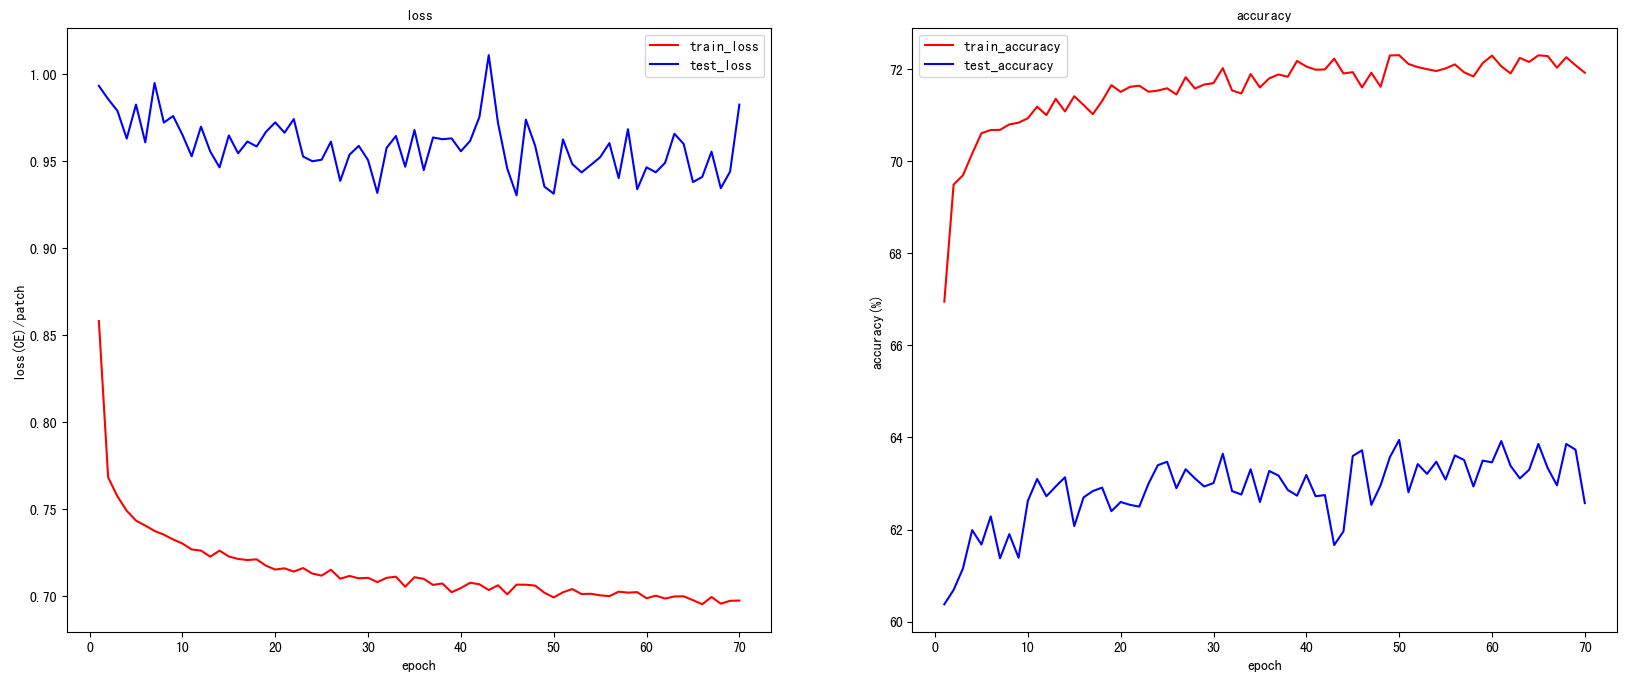

In [43]:
plot_loss_n(70)

## 保存与加载

In [47]:
# # 保存loss与accuracy
# train_loss_list = np.array(train_loss_list)
# test_loss_list = np.array(test_loss_list)
# train_accuracy_list = np.array(train_accuracy_list)
# test_accuracy_list = np.array(test_accuracy_list)
# np.savetxt("..//Final-Project//log_save//Net_mix_drop_train_loss_list.txt",train_loss_list)
# np.savetxt("..//Final-Project//log_save//Net_mix_drop_test_loss_list.txt",test_loss_list)
# np.savetxt("..//Final-Project//log_save//Net_mix_drop_train_accuracy_list.txt",train_accuracy_list)
# np.savetxt("..//Final-Project//log_save//Net_mix_drop_test_accuracy_list.txt",test_accuracy_list)

In [24]:
save_path = '..//Final-Project//model_save//'
state_dict = torch.load(save_path+"Net_mix_drop_epoch50.pth")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [25]:
train_loss_list = np.loadtxt("..//Final-Project//log_save//Net_mix_drop_train_loss_list.txt")
test_loss_list = np.loadtxt("..//Final-Project//log_save//Net_mix_drop_test_loss_list.txt")
train_accuracy_list = np.loadtxt("..//Final-Project//log_save//Net_mix_drop_train_accuracy_list.txt")
test_accuracy_list = np.loadtxt("..//Final-Project//log_save//Net_mix_drop_test_accuracy_list.txt")

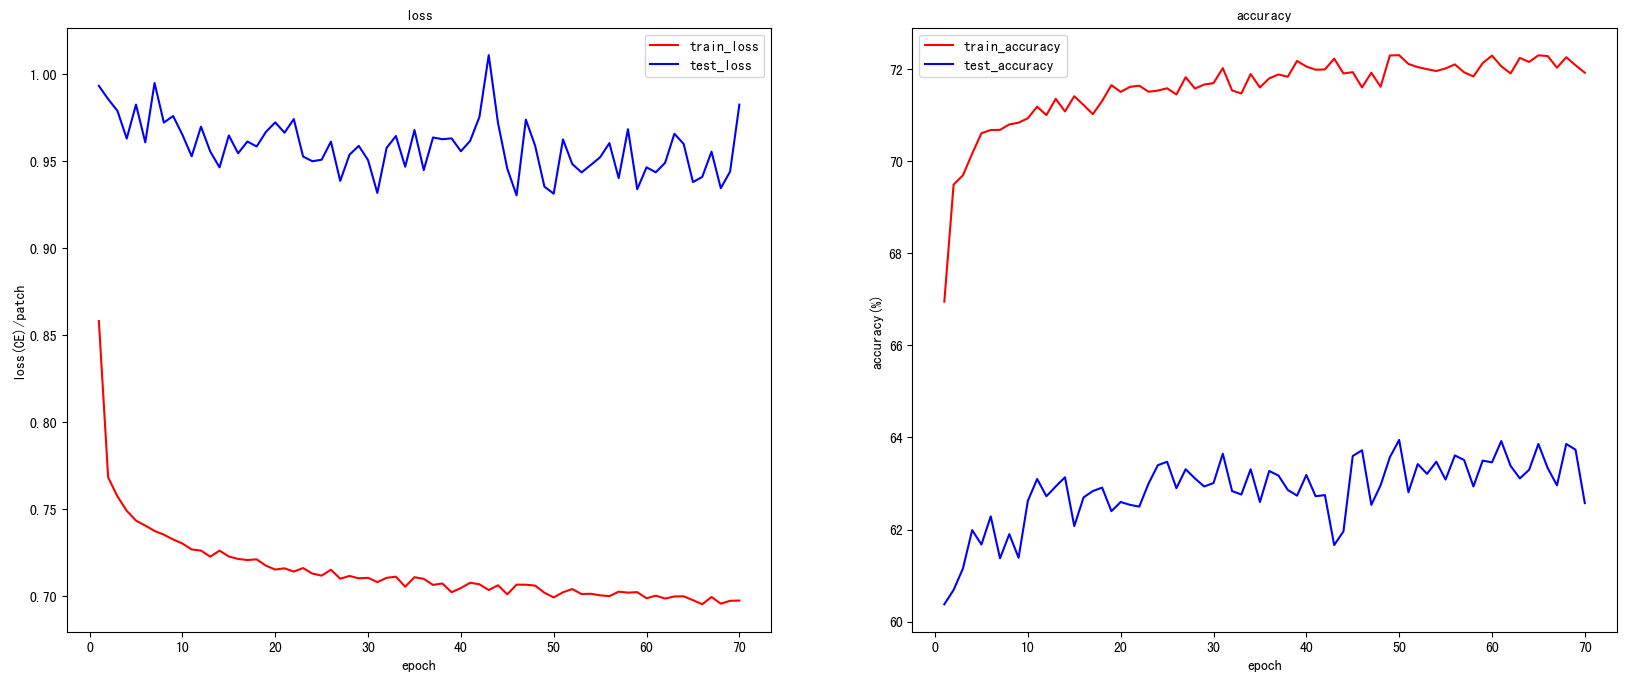

In [28]:
plot_loss_n(70)

In [52]:
test_accuracy_list.max()

63.94710578842315

In [53]:
test_accuracy_list.argmax()

49

In [58]:
test_loss_list.min()

0.9303297349093798

In [59]:
test_loss_list.argmin()

45

In [64]:
for i in range(34):
    idx = i*2-1
    print("epoch "+str(idx+1)+":")
    print("accuracy : "+ str(test_accuracy_list[idx]))
    print("loss : "+ str(test_loss_list[idx]))

epoch 0:
accuracy : 62.5748502994012
loss : 0.9824358434258345
epoch 2:
accuracy : 60.69111776447106
loss : 0.9856096388299962
epoch 4:
accuracy : 61.98852295409181
loss : 0.9629405994421827
epoch 6:
accuracy : 62.28792415169661
loss : 0.9607562814911682
epoch 8:
accuracy : 61.90119760479042
loss : 0.9721412203588826
epoch 10:
accuracy : 62.624750499002
loss : 0.9651267684832543
epoch 12:
accuracy : 62.724550898203596
loss : 0.9697791357745905
epoch 14:
accuracy : 63.13622754491018
loss : 0.9463800954820213
epoch 16:
accuracy : 62.699600798403196
loss : 0.9544603643630317
epoch 18:
accuracy : 62.91167664670659
loss : 0.9583712370244567
epoch 20:
accuracy : 62.5998003992016
loss : 0.9722311116212202
epoch 22:
accuracy : 62.5
loss : 0.974140537155424
epoch 24:
accuracy : 63.39820359281437
loss : 0.9499061599544839
epoch 26:
accuracy : 62.899201596806385
loss : 0.9611734572552635
epoch 28:
accuracy : 63.11127744510978
loss : 0.9536464748283228
epoch 30:
accuracy : 63.01147704590819
loss :

In [65]:
# 取第50个epoch
test_accuracy_list[49]

63.94710578842315

## 统计

In [29]:
import torchmetrics

In [30]:
categories = ['disgust','fear','happy','surprise','sad','angry','neutral']
# label = 0,1,2,3,4,5,6

In [33]:
def test_metrics():
    with torch.no_grad():
        # 实例化相关metrics的计算对象
        test_f1 = torchmetrics.F1Score(average='none', num_classes=7).to(device)
        test_acc = torchmetrics.Accuracy().to(device)
        test_recall = torchmetrics.Recall(average='none', num_classes=7).to(device)
        test_precision = torchmetrics.Precision(average='none', num_classes=7).to(device)
        test_auc = torchmetrics.AUROC(average="macro", num_classes=7).to(device)
        # 开启测试阶段
        model.eval()
        for data in test_loader:
            images, labels = data
        
            # 将用来计算的张量迁移到GPU
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            
             # 一个batch进行计算迭代
            test_acc(outputs.argmax(1), labels)
            test_auc.update(outputs, labels)
            test_f1.update(outputs.argmax(1), labels)
            test_recall(outputs.argmax(1), labels)
            test_precision(outputs.argmax(1), labels)

    # 计算一个epoch的accuray、recall、precision
    total_acc = test_acc.compute()
    total_recall = test_recall.compute()
    total_precision = test_precision.compute()
    total_f1 = test_f1.compute()
    total_auc = test_auc.compute()
    print("Accuracy of every class:" ,total_acc)
    print("recall of every class: ", total_recall)
    print("precision of every class: ", total_precision)
    print("f1 score of every class: ", total_f1)
    print("auc of every class: ", total_auc.item())
    # 清空计算对象
    test_precision.reset()
    test_acc.reset()
    test_f1.reset()
    test_recall.reset()
    test_auc.reset()

In [34]:
test_metrics()

C:\Users\Eden_\AppData\Local\Programs\Python\Python37\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


Accuracy of every class: tensor(0.6395, device='cuda:0')
recall of every class:  tensor([0.6260, 0.5124, 0.7205, 0.5723, 0.6246, 0.3429, 0.9811],
       device='cuda:0')
precision of every class:  tensor([0.6540, 0.5226, 0.6149, 0.5280, 0.5407, 0.5544, 0.9679],
       device='cuda:0')
f1 score of every class:  tensor([0.6397, 0.5175, 0.6635, 0.5492, 0.5796, 0.4237, 0.9744],
       device='cuda:0')
auc of every class:  0.8554946780204773
